In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
pd.options.display.max_columns = None

attrition = pd.read_csv('Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition = shuffle(attrition)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
444,48,No,Travel_Rarely,163,Sales,2,5,Marketing,1,595,2,Female,37,3,2,Sales Executive,4,Married,4051,19658,2,Y,No,14,3,1,80,1,14,2,3,9,7,6,7
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,Y,No,11,3,1,80,3,10,6,3,9,8,7,5
917,34,No,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,3,Female,86,3,2,Sales Executive,1,Single,4538,6039,0,Y,Yes,12,3,4,80,0,4,3,3,3,2,0,2
869,46,No,Travel_Rarely,1450,Research & Development,15,2,Life Sciences,1,1217,4,Male,52,3,5,Research Director,2,Married,19081,10849,5,Y,No,11,3,1,80,1,25,2,3,4,2,0,3
810,46,No,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,1,Male,52,3,4,Manager,3,Married,17465,15596,3,Y,No,12,3,4,80,1,23,3,3,12,9,4,9


In [4]:
attrition_no = attrition[attrition['Attrition'] == 'No'].iloc[:550]
attrition_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
444,48,No,Travel_Rarely,163,Sales,2,5,Marketing,1,595,2,Female,37,3,2,Sales Executive,4,Married,4051,19658,2,Y,No,14,3,1,80,1,14,2,3,9,7,6,7
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,Y,No,11,3,1,80,3,10,6,3,9,8,7,5
917,34,No,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,3,Female,86,3,2,Sales Executive,1,Single,4538,6039,0,Y,Yes,12,3,4,80,0,4,3,3,3,2,0,2
869,46,No,Travel_Rarely,1450,Research & Development,15,2,Life Sciences,1,1217,4,Male,52,3,5,Research Director,2,Married,19081,10849,5,Y,No,11,3,1,80,1,25,2,3,4,2,0,3
810,46,No,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,1,Male,52,3,4,Manager,3,Married,17465,15596,3,Y,No,12,3,4,80,1,23,3,3,12,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,24,No,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,Male,57,2,1,Laboratory Technician,1,Divorced,2296,10036,0,Y,No,14,3,2,80,3,2,3,3,1,1,0,0
859,29,No,Travel_Rarely,942,Research & Development,15,1,Life Sciences,1,1202,2,Female,69,1,1,Research Scientist,4,Married,2168,26933,0,Y,Yes,18,3,1,80,1,6,2,2,5,4,1,3
48,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,Y,Yes,21,4,3,80,0,14,4,3,9,6,0,8
1316,43,No,Travel_Frequently,1422,Sales,2,4,Life Sciences,1,1849,1,Male,92,3,2,Sales Executive,4,Married,5675,19246,1,Y,No,20,4,3,80,1,7,5,3,7,7,7,7


In [5]:
attrition_yes = attrition[attrition['Attrition'] == 'Yes']
attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1106,30,Yes,Travel_Rarely,740,Sales,1,3,Life Sciences,1,1562,2,Male,64,2,2,Sales Executive,1,Married,9714,5323,1,Y,No,11,3,4,80,1,10,4,3,10,8,6,7
214,30,Yes,Travel_Rarely,1005,Research & Development,3,3,Technical Degree,1,297,4,Female,88,3,1,Research Scientist,1,Single,2657,8556,5,Y,Yes,11,3,3,80,0,8,5,3,5,2,0,4
796,25,Yes,Travel_Rarely,1219,Research & Development,4,1,Technical Degree,1,1106,4,Male,32,3,1,Laboratory Technician,4,Married,3691,4605,1,Y,Yes,15,3,2,80,1,7,3,4,7,7,5,6
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,1,Male,66,3,3,Sales Executive,1,Single,10448,5843,6,Y,Yes,13,3,2,80,0,15,2,2,2,2,2,2
608,55,Yes,Travel_Rarely,436,Sales,2,1,Medical,1,842,3,Male,37,3,2,Sales Executive,4,Single,5160,21519,4,Y,No,16,3,3,80,0,12,3,2,9,7,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,30,Yes,Travel_Frequently,334,Sales,26,4,Marketing,1,299,3,Female,52,2,2,Sales Executive,1,Single,6696,22967,5,Y,No,15,3,3,80,0,9,5,2,6,3,0,1
547,42,Yes,Travel_Frequently,933,Research & Development,19,3,Medical,1,752,3,Male,57,4,1,Research Scientist,3,Divorced,2759,20366,6,Y,Yes,12,3,4,80,0,7,2,3,2,2,2,2
777,21,Yes,Travel_Rarely,1334,Research & Development,10,3,Life Sciences,1,1079,3,Female,36,2,1,Laboratory Technician,1,Single,1416,17258,1,Y,No,13,3,1,80,0,1,6,2,1,0,1,0
838,42,Yes,Travel_Frequently,481,Sales,12,3,Life Sciences,1,1167,3,Male,44,3,4,Sales Executive,1,Single,13758,2447,0,Y,Yes,12,3,2,80,0,22,2,2,21,9,13,14


In [6]:
# Check data quality
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

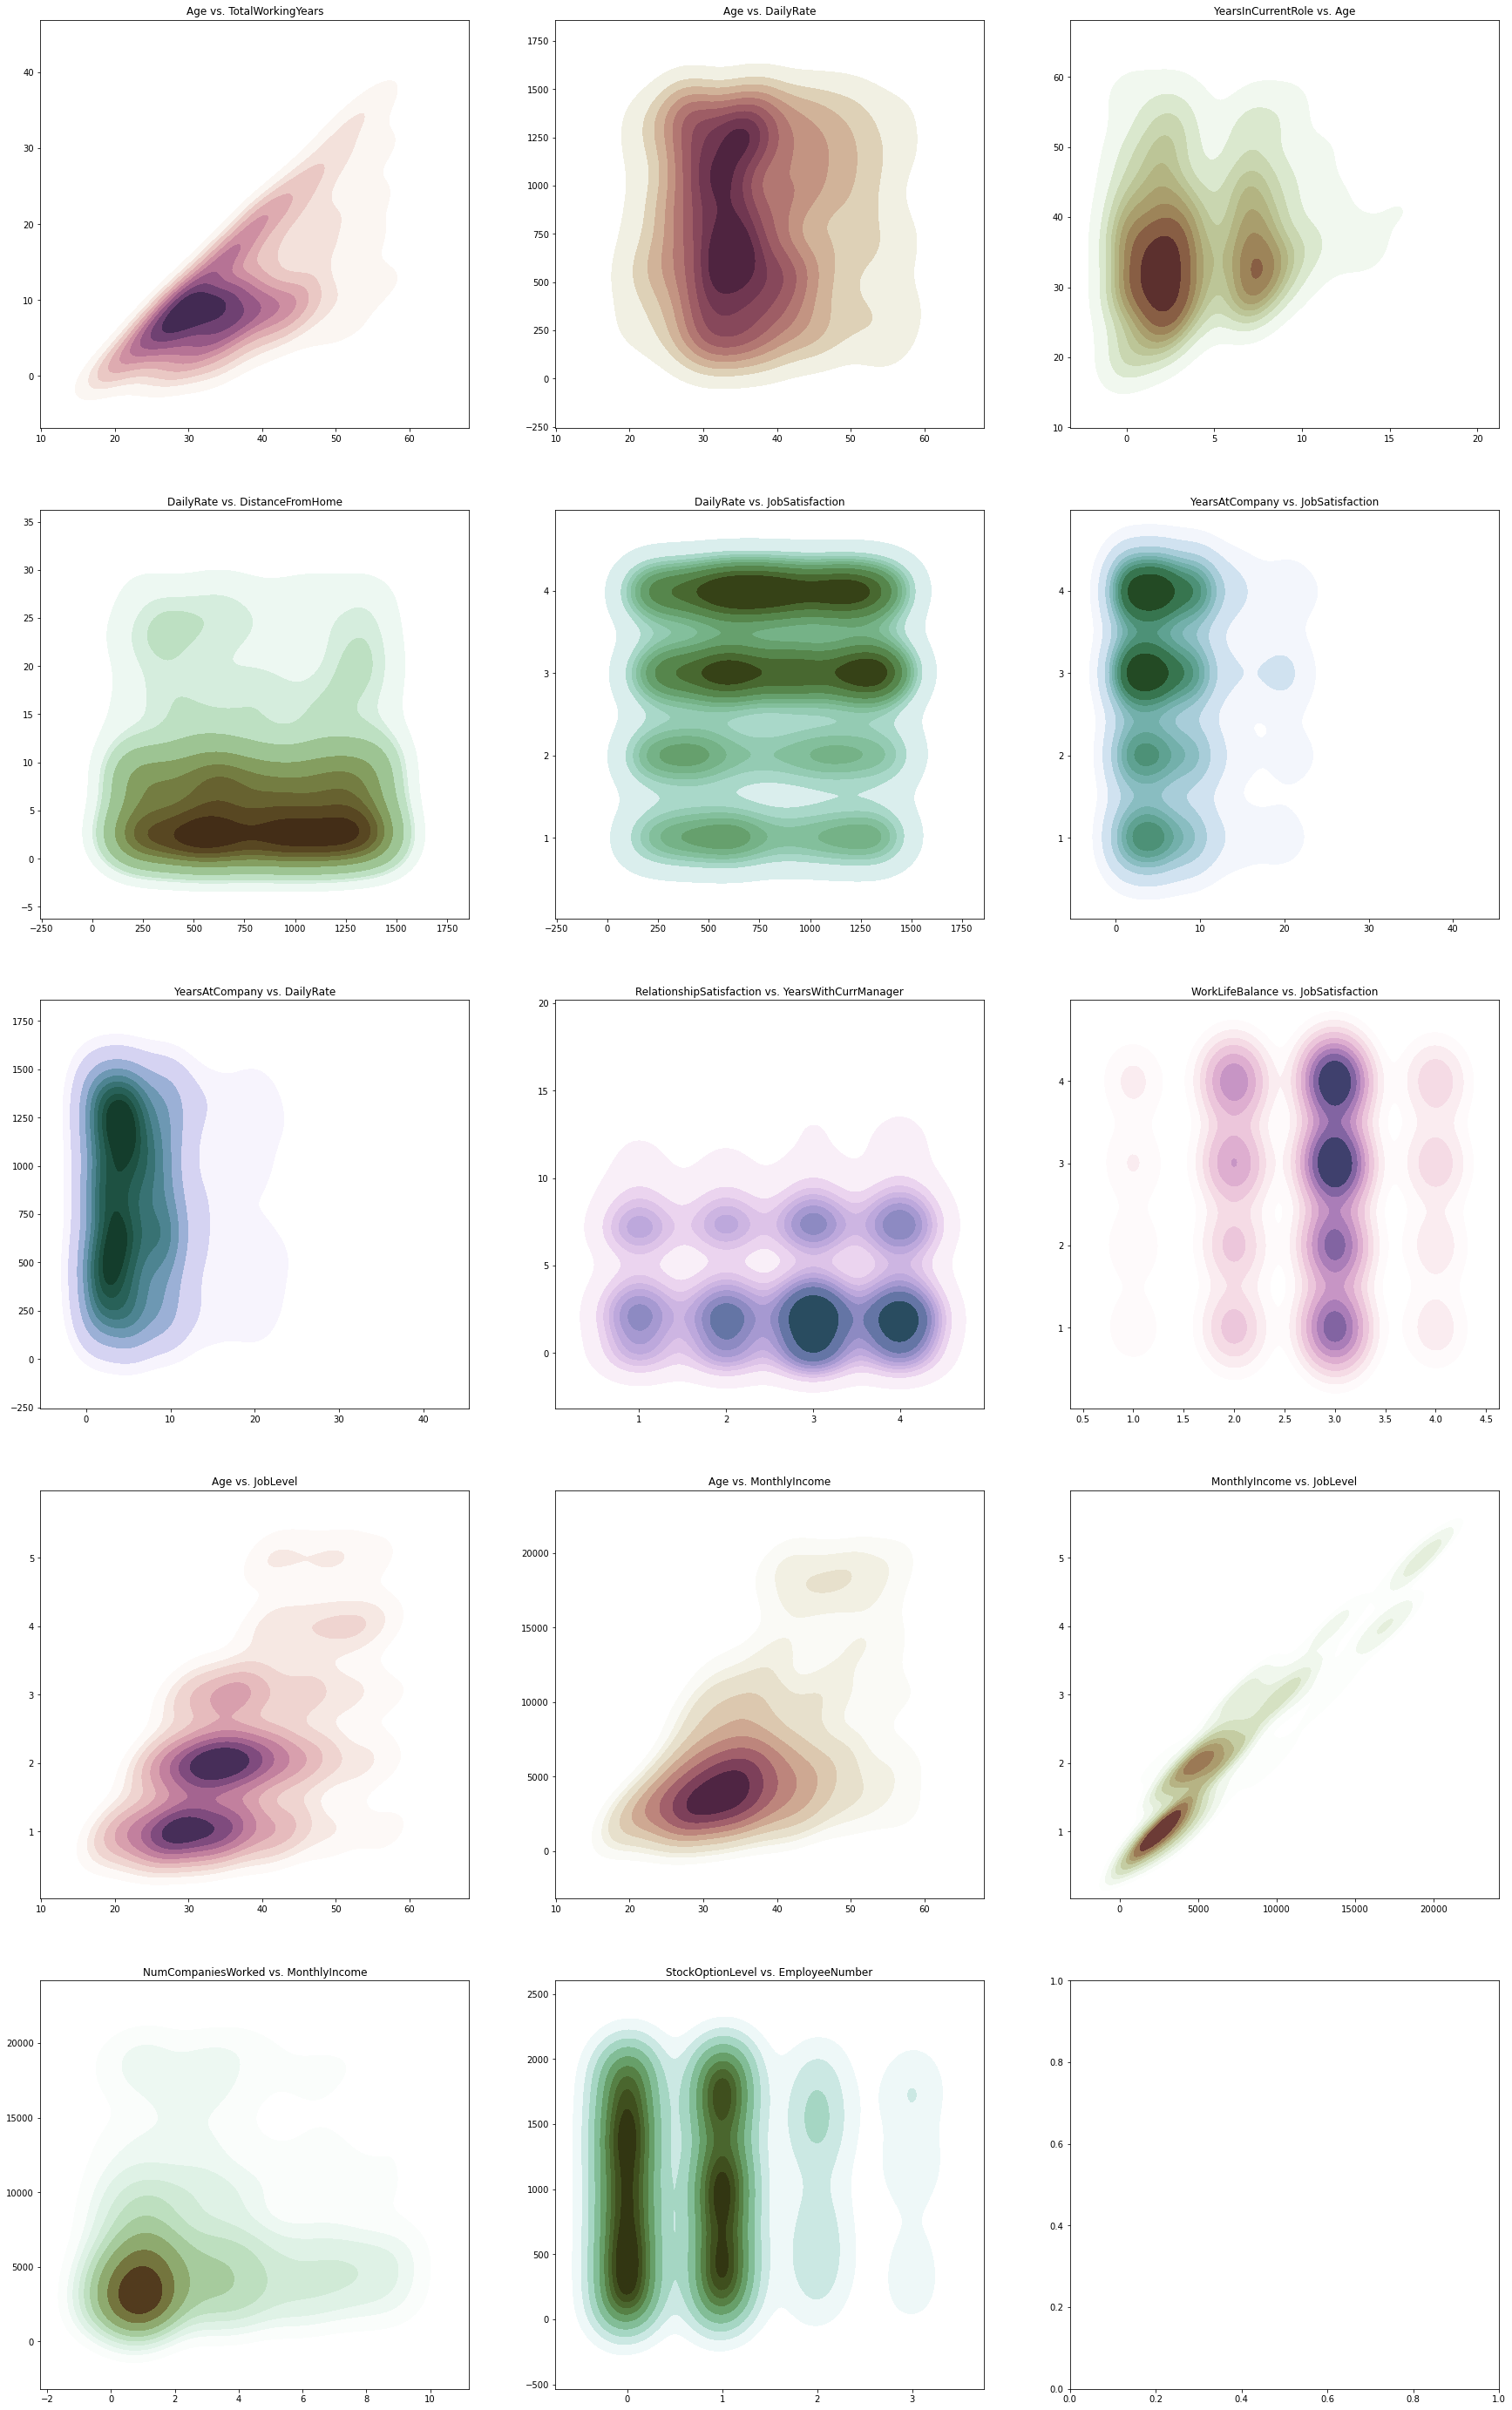

In [7]:
# Creating subplots
f, axes = plt.subplots(5, 3, figsize=(30,50), sharex=False, sharey=False)

# Set color palette
color_start = 0.0
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label):
    global color_start, cmap, axes, axes_x, axes_y
    x = attrition[x_label].values
    y = attrition[y_label].values
    sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title='{} vs. {}'.format(x_label, y_label))
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1
    color_start = color_start + 0.33
    cmap = sns.cubehelix_palette(start=color_start, light=1, as_cmap=True)


plot_xy('Age', 'TotalWorkingYears')
plot_xy('Age', 'DailyRate')
plot_xy('YearsInCurrentRole', 'Age')
plot_xy('DailyRate', 'DistanceFromHome')
plot_xy('DailyRate', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'DailyRate')
plot_xy('RelationshipSatisfaction', 'YearsWithCurrManager')
plot_xy('WorkLifeBalance', 'JobSatisfaction')
plot_xy('Age', 'JobLevel')
plot_xy('Age', 'MonthlyIncome')
plot_xy('MonthlyIncome', 'JobLevel')
plot_xy('NumCompaniesWorked', 'MonthlyIncome')
plot_xy('StockOptionLevel', 'EmployeeNumber')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

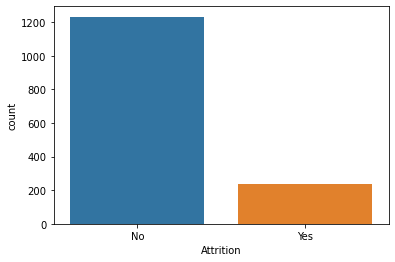

In [8]:
# Convert attrition to numericals
target_map = {'Yes':1, 'No':0}
attrition[u'Attrition_num'] = attrition[u'Attrition'].apply(lambda x: target_map[x])

sns.countplot(x='Attrition', data=attrition)

<AxesSubplot:>

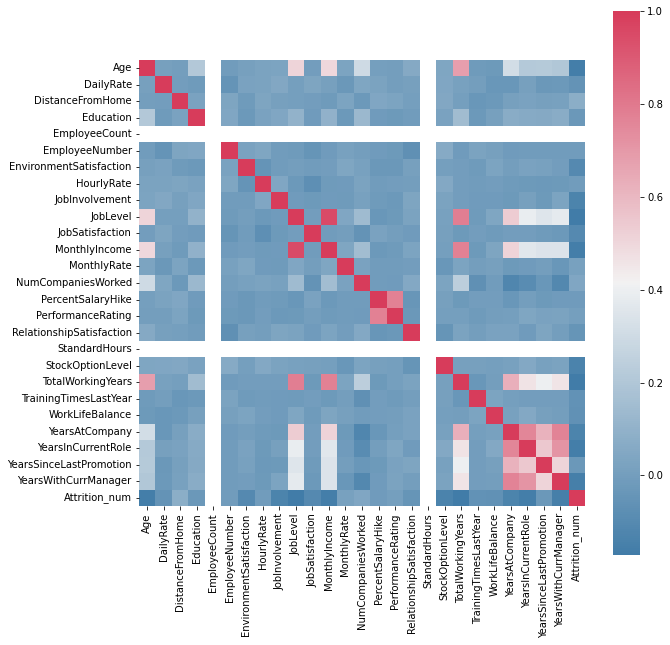

In [9]:
# Remove non-numerical columns
attrition_numerical_cols = attrition._get_numeric_data()
corr = attrition_numerical_cols.corr()

# Graph heatmap to visualize correlations between data
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 5, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, ax=ax)

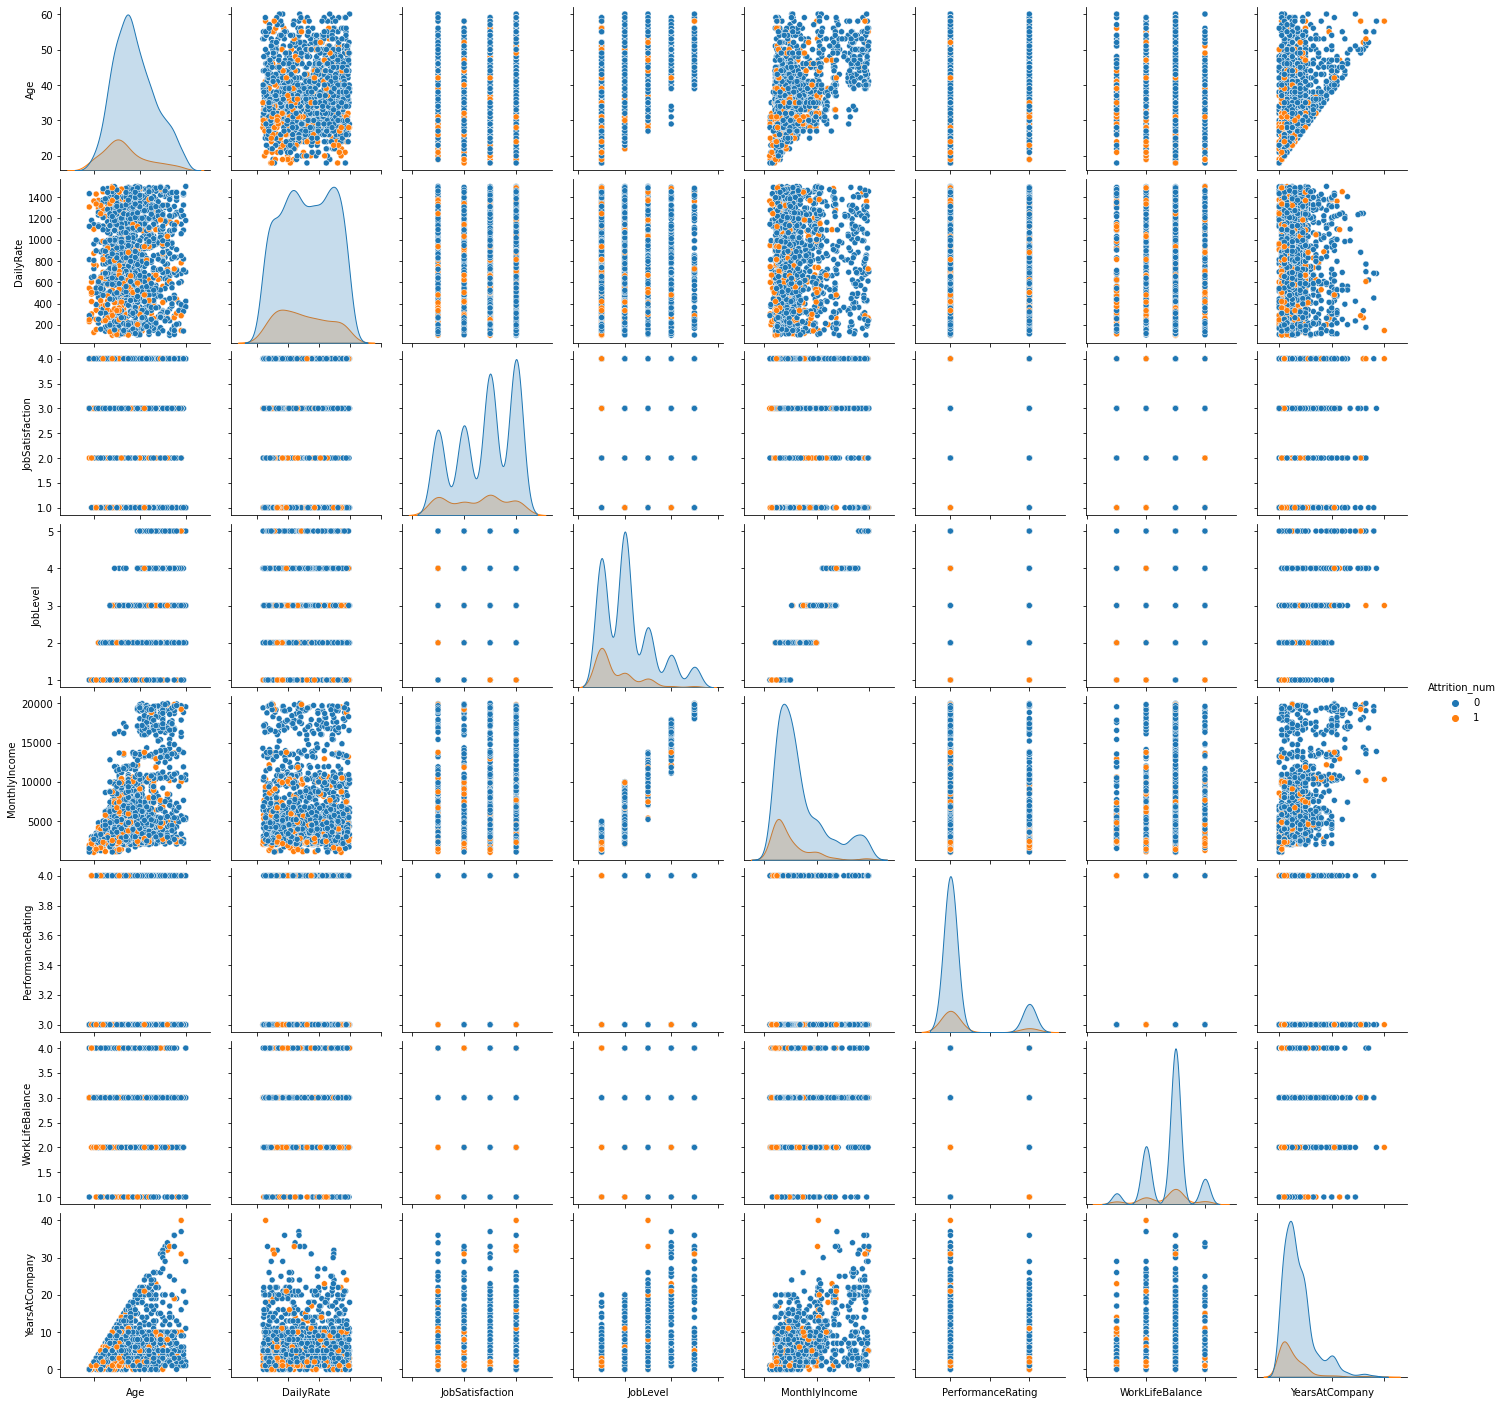

In [10]:
numerical = ['Age', 'DailyRate', 'JobSatisfaction', 'JobLevel', 'MonthlyIncome', 'PerformanceRating', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_num']

# Plot pairplot to visualize correlations
g = sns.pairplot(attrition[numerical], hue='Attrition_num')
g.set(xticklabels=[])

In [11]:
categorical = attrition.select_dtypes(include=['object'])
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
444,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Married,Y,No
944,No,Non-Travel,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
917,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Single,Y,Yes
869,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
810,No,Travel_Rarely,Sales,Marketing,Male,Manager,Married,Y,No
...,...,...,...,...,...,...,...,...,...
43,No,Travel_Frequently,Sales,Life Sciences,Male,Sales Executive,Single,Y,No
1345,No,Travel_Rarely,Research & Development,Other,Female,Manufacturing Director,Married,Y,Yes
1002,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
34,Yes,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y,Yes


In [12]:
numerical = attrition_numerical_cols.drop(u'Attrition_num', 1)
numerical

C:\Users\hp\AppData\Local\Temp/ipykernel_18744/1012465522.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numerical = attrition_numerical_cols.drop(u'Attrition_num', 1)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
444,48,163,2,5,1,595,2,37,3,2,4,4051,19658,2,14,3,1,80,1,14,2,3,9,7,6,7
944,28,1476,1,3,1,1315,3,55,1,2,4,6674,16392,0,11,3,1,80,3,10,6,3,9,8,7,5
917,34,131,2,3,1,1281,3,86,3,2,1,4538,6039,0,12,3,4,80,0,4,3,3,3,2,0,2
869,46,1450,15,2,1,1217,4,52,3,5,2,19081,10849,5,11,3,1,80,1,25,2,3,4,2,0,3
810,46,406,3,1,1,1124,1,52,3,4,3,17465,15596,3,12,3,4,80,1,23,3,3,12,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,27,994,8,3,1,56,4,37,3,3,3,8726,2975,1,15,3,4,80,0,9,0,3,9,8,1,7
1345,35,219,16,2,1,1886,4,44,2,2,2,4788,25388,0,11,3,4,80,0,4,2,3,3,2,0,2
1002,35,200,18,2,1,1412,3,60,3,3,4,9362,19944,2,11,3,3,80,0,10,2,3,2,2,2,2
34,24,813,1,3,1,45,2,61,3,1,4,2293,3020,2,16,3,1,80,1,6,2,2,2,0,2,0


In [13]:
categorical = pd.get_dummies(categorical)
categorical

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
444,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
944,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
917,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
869,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
810,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0
1345,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1002,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
34,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1


In [14]:
pd.options.display.max_columns = None
input_data = pd.concat([numerical, categorical], axis=1)
input_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
444,48,163,2,5,1,595,2,37,3,2,4,4051,19658,2,14,3,1,80,1,14,2,3,9,7,6,7,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
944,28,1476,1,3,1,1315,3,55,1,2,4,6674,16392,0,11,3,1,80,3,10,6,3,9,8,7,5,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
917,34,131,2,3,1,1281,3,86,3,2,1,4538,6039,0,12,3,4,80,0,4,3,3,3,2,0,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
869,46,1450,15,2,1,1217,4,52,3,5,2,19081,10849,5,11,3,1,80,1,25,2,3,4,2,0,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
810,46,406,3,1,1,1124,1,52,3,4,3,17465,15596,3,12,3,4,80,1,23,3,3,12,9,4,9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,27,994,8,3,1,56,4,37,3,3,3,8726,2975,1,15,3,4,80,0,9,0,3,9,8,1,7,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0
1345,35,219,16,2,1,1886,4,44,2,2,2,4788,25388,0,11,3,4,80,0,4,2,3,3,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1002,35,200,18,2,1,1412,3,60,3,3,4,9362,19944,2,11,3,3,80,0,10,2,3,2,2,2,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0
34,24,813,1,3,1,45,2,61,3,1,4,2293,3020,2,16,3,1,80,1,6,2,2,2,0,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1


In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_scaled = min_max_scaler.fit_transform(input_data)
input_data_normalized = pd.DataFrame(np_scaled, columns=input_data.columns.values)
input_data_normalized

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.714286,0.043665,0.035714,1.00,0.0,0.287373,0.333333,0.100000,0.666667,0.25,1.000000,0.160190,0.705240,0.222222,0.214286,0.0,0.000000,0.0,0.333333,0.350,0.333333,0.666667,0.225,0.388889,0.400000,0.411765,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.238095,0.983536,0.000000,0.50,0.0,0.635704,0.666667,0.357143,0.000000,0.25,1.000000,0.298315,0.574102,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.250,1.000000,0.666667,0.225,0.444444,0.466667,0.294118,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.380952,0.020759,0.035714,0.50,0.0,0.619255,0.666667,0.800000,0.666667,0.25,0.000000,0.185835,0.158402,0.000000,0.071429,0.0,1.000000,0.0,0.000000,0.100,0.500000,0.666667,0.075,0.111111,0.000000,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.964925,0.500000,0.25,0.0,0.588292,1.000000,0.314286,0.666667,1.00,0.333333,0.951659,0.351536,0.555556,0.000000,0.0,0.000000,0.0,0.333333,0.625,0.333333,0.666667,0.100,0.111111,0.000000,0.176471,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.666667,0.217609,0.071429,0.00,0.0,0.543299,0.000000,0.314286,0.666667,0.75,0.666667,0.866561,0.542140,0.333333,0.071429,0.0,1.000000,0.0,0.333333,0.575,0.500000,0.666667,0.300,0.500000,0.266667,0.529412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.214286,0.638511,0.250000,0.50,0.0,0.026609,1.000000,0.100000,0.666667,0.50,0.666667,0.406372,0.035374,0.111111,0.285714,0.0,1.000000,0.0,0.000000,0.225,0.000000,0.666667,0.225,0.444444,0.066667,0.411765,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.404762,0.083751,0.535714,0.25,0.0,0.911950,1.000000,0.200000,0.333333,0.25,0.333333,0.198999,0.935314,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.100,0.333333,0.666667,0.075,0.111111,0.000000,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1467,0.404762,0.070150,0.607143,0.25,0.0,0.682632,0.666667,0.428571,0.666667,0.50,1.000000,0.439863,0.716724,0.222222,0.000000,0.0,0.666667,0.0,0.000000,0.250,0.333333,0.666667,0.050,0.111111,0.133333,0.117647,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [16]:
input_data_labels = input_data_normalized[['Attrition_No', 'Attrition_Yes']]
input_data_nums = input_data_normalized.drop(['Attrition_Yes', 'Attrition_No'], axis=1)

In [17]:
training_data = input_data_nums[0:600]
training_labels = input_data_labels[0:600]

test_data = input_data_nums[600:]
test_labels = input_data_labels[600:]

training_data_batches = np.array_split(training_data, 10)
training_labels_batches = np.array_split(training_labels, 10)

for (data_batch, label_batch) in zip(training_data_batches, training_labels_batches):
    for (data, label) in zip(data_batch.values, label_batch.values):
        print(data, label)

[0.71428571 0.043665   0.03571429 1.         0.         0.287373
 0.33333333 0.1        0.66666667 0.25       1.         0.16018957
 0.70523991 0.22222222 0.21428571 0.         0.         0.
 0.33333333 0.35       0.33333333 0.66666667 0.225      0.38888889
 0.4        0.41176471 0.         0.         1.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         1.         0.         0.         1.
 0.        ] [1. 0.]
[0.23809524 0.98353615 0.         0.5        0.         0.63570392
 0.66666667 0.35714286 0.         0.25       1.         0.2983149
 0.57410159 0.         0.         0.         0.         0.
 1.         0.25       1.         0.66666667 0.225      0.44444444
 0.46666667 0.29411765 1.         0.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.  

In [18]:
data = pd.read_csv('Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [19]:
#get the dimension of the dataframe
data.shape

(1470, 35)

In [20]:
#get row names of the dataframe
data.index

RangeIndex(start=0, stop=1470, step=1)

In [21]:
#get column names of the dataframe
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
#look at basic information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


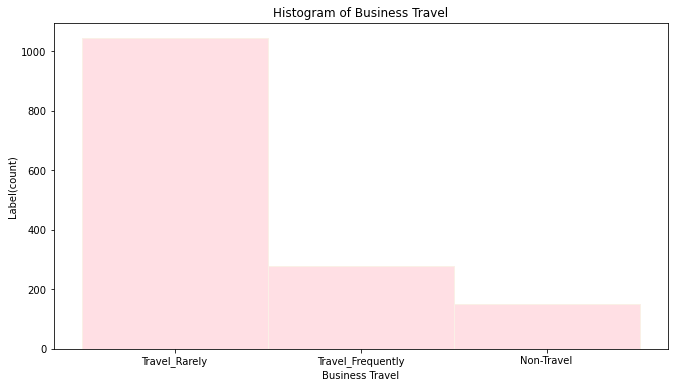

In [24]:
#create a histogram of the "BusinessTravel" feature
plt.figure(figsize=(11,6))
sns.histplot(data=data, x="BusinessTravel", color="pink", edgecolor="linen", alpha=0.5, bins=5)
plt.title("Histogram of Business Travel")
plt.xlabel("Business Travel")
plt.ylabel("Label(count)")
plt.show()

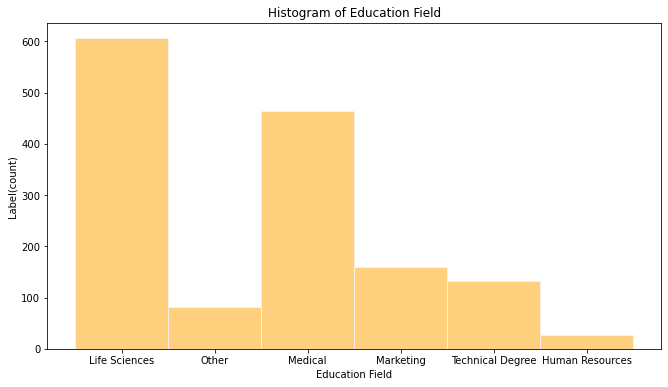

In [25]:
#create a histogram of the "EducationField" feature
plt.figure(figsize=(11,6))
sns.histplot(data=data, x="EducationField", color="orange", edgecolor="linen", alpha=0.5, bins=5)
plt.title("Histogram of Education Field")
plt.xlabel("Education Field")
plt.ylabel("Label(count)")
plt.show()

## Exploratory Data Analysis (EDA) 

Let's visualize some of the data to understand distributions and relationships

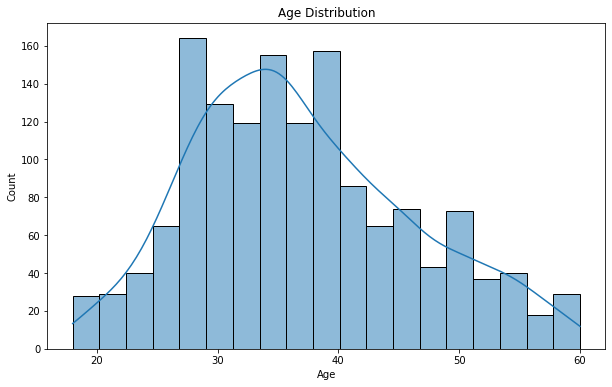

In [26]:
#plot distribution of age
plt.figure(figsize=(10,6))
sns.histplot(data=data['Age'], kde= True)
plt.title("Age Distribution")
plt.show()

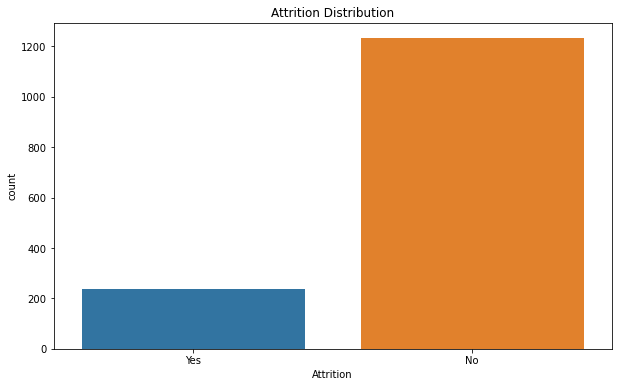

In [27]:
#plot distribution of attrition
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition',data=data)
plt.title("Attrition Distribution")
plt.show()

## Calculate Mean, Median & Mode 

In [29]:
#Compute the mean for numerical features
numerical_columns= data.select_dtypes(include=['number']).columns
mean_values=data[numerical_columns].mean()

In [30]:
#Display the mean values
print("Mean Values:")
print(mean_values)

Mean Values:
Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
Yea

In [31]:
#Calculate the average of the mean values
average_mean= mean_values.mean()

In [32]:
#Display the average of the mean values
print("Average of the Mean Values:")
print(average_mean)

Average of the Mean Values:
881.0962061747775


In [33]:
# Compute the median for numerical features
median_values= data[numerical_columns].median()

In [34]:
# Display the median values
print("Median Values:")
print(median_values)

Median Values:
Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64


In [35]:
# Calculate the mode for each numerical columns
mode_values =data[numerical_columns].mode().iloc[0]

In [36]:
# Display the mode values
print("Mode Value:")
print(mode_values)

Mode Value:
Age                           35.0
DailyRate                    691.0
DistanceFromHome               2.0
Education                      3.0
EmployeeCount                  1.0
EmployeeNumber                 1.0
EnvironmentSatisfaction        3.0
HourlyRate                    66.0
JobInvolvement                 3.0
JobLevel                       1.0
JobSatisfaction                4.0
MonthlyIncome               2342.0
MonthlyRate                 4223.0
NumCompaniesWorked             1.0
PercentSalaryHike             11.0
PerformanceRating              3.0
RelationshipSatisfaction       3.0
StandardHours                 80.0
StockOptionLevel               0.0
TotalWorkingYears             10.0
TrainingTimesLastYear          2.0
WorkLifeBalance                3.0
YearsAtCompany                 5.0
YearsInCurrentRole             2.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           2.0
Name: 0, dtype: float64


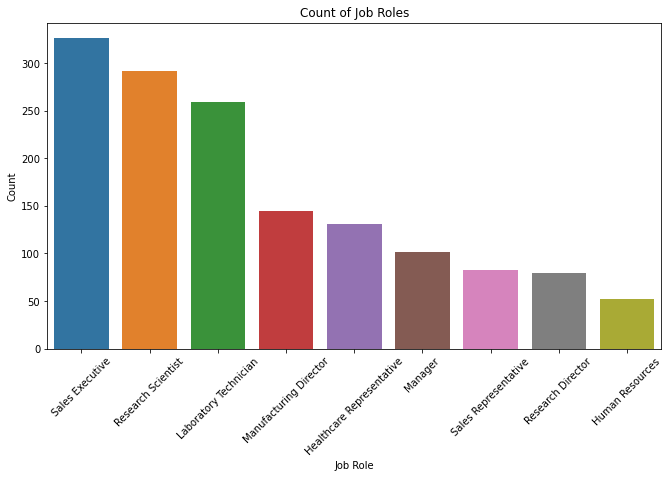

In [37]:
plt.figure(figsize=(11,6))
#Remove 'palette' parameter
sns.countplot(data=data, x="JobRole")

plt.title("Count of Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [38]:
# Count the occurrences of each education field
education_field_counts = data['EducationField'].value_counts()

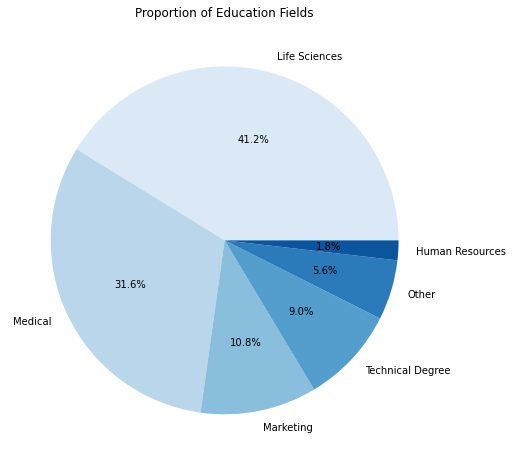

In [39]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(education_field_counts, labels=education_field_counts.index, autopct='%1.1f%%', colors= sns.color_palette("Blues"))
plt.title("Proportion of Education Fields")
plt.show()

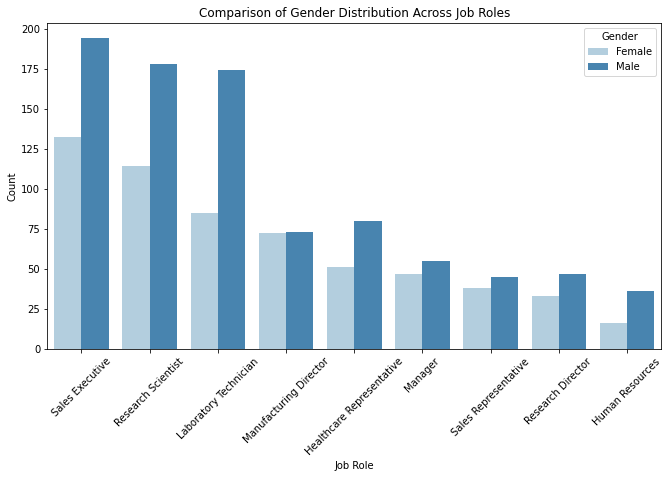

In [40]:
plt.figure(figsize=(11,6))

sns.countplot(data=data, x="JobRole", hue='Gender', palette='Blues')

plt.title("Comparison of Gender Distribution Across Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

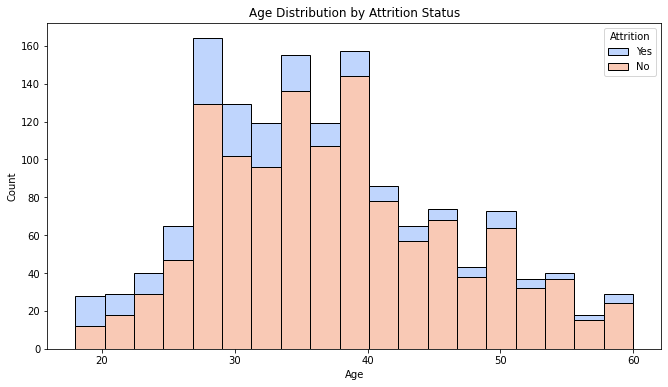

In [42]:
#Attrition by Age
plt.figure(figsize=(11,6))

sns.histplot(data=data, x="Age", hue='Attrition', multiple='stack', palette='coolwarm')

plt.title("Age Distribution by Attrition Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [43]:
# Calculate the average age
average_age = data['Age'].mean()

#Print the Result
print(f"Average Age: {average_age}")

Average Age: 36.923809523809524


In [44]:
# Count the number of employees who left
num_employees_left = (data['Attrition']=='Yes').sum()

# Total number of employees
total_employees = len(data)

# Calculate the attrition rate
attrition_rate = (num_employees_left / total_employees) * 100

#Print the attrition rate
print(f"Attrition Rate : {attrition_rate:.2f}%")

Attrition Rate : 16.12%


In [45]:
# Find the most common department
most_common_department = data['Department'].mode()[0]

# Print the result
print(f"Most Common Department : {most_common_department}")

Most Common Department : Research & Development


In [47]:
# Calculate the average monthly income
average_monthly_income = data['MonthlyIncome'].mean()

# Print the result
print(f"Average Monthly Income : {average_monthly_income:.2f}")

Average Monthly Income : 6502.93


# Thank You